In [11]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

In [2]:
G = ox.graph_from_place("Colombo, PR", network_type="drive")

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [5]:
gdf_edges[gdf_edges["ref"] == "BR-116"]

,,,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,tunnel,width,access
u,v,key,,,,,,,,,,,,,,,
266901352,3986572171,0,663135982,True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,359.268,"LINESTRING (-49.19136 -25.38924, -49.18998 -25...",NaN,NaN,NaN,NaN,NaN
267057092,4263442898,0,"[481893627, 481893628]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,292.110,"LINESTRING (-49.16505 -25.38207, -49.16640 -25...",NaN,NaN,NaN,NaN,NaN
267057099,267057102,0,"[551056592, 47403057, 47403055]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,323.079,"LINESTRING (-49.17576 -25.38667, -49.17622 -25...",yes,NaN,NaN,NaN,NaN
267057102,6207487606,0,"[551056600, 551056585, 551056596]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,1114.888,"LINESTRING (-49.17881 -25.38759, -49.18445 -25...",NaN,NaN,NaN,NaN,NaN
267057110,603386234,0,551056602,True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,118.417,"LINESTRING (-49.19094 -25.38914, -49.19212 -25...",NaN,NaN,NaN,NaN,NaN
267057238,603368371,0,"[47402464, 481893616, 481893989]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,555.509,"LINESTRING (-49.12671 -25.37088, -49.12829 -25...",yes,NaN,NaN,NaN,NaN
603364072,267057092,0,481893626,True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,972.777,"LINESTRING (-49.15632 -25.37830, -49.15677 -25...",NaN,NaN,NaN,NaN,NaN
603368370,603368396,0,"[47402465, 47402466, 481893615]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,505.922,"LINESTRING (-49.13157 -25.37161, -49.12895 -25...",yes,NaN,NaN,NaN,NaN
603368371,1780873044,0,"[47402459, 1215876071]",True,2,BR-116,Rodovia Régis Bittencourt,motorway,80,False,473.242,"LINESTRING (-49.13218 -25.37158, -49.13425 -25...",NaN,NaN,NaN,NaN,NaN


<Axes: >

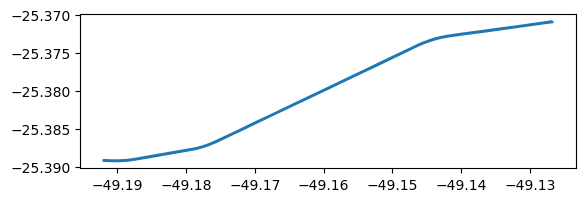

In [6]:
gdf_edges[gdf_edges["ref"] == "BR-116"].plot()

In [19]:
G = ox.graph_from_place("São Carlos, SP", network_type="drive")

s = max(nx.strongly_connected_components(G), key=len)
G = G.subgraph(s)

# Convert the graph to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Extract the edges' geometry and create a list of ordered points
ordered_points = []

# Iterate over each edge to get the start and end points
for u, v, key, data in G.edges(keys=True, data=True):
    line = data.get("geometry", None)
    if line is None:
        continue
    if line.geom_type == "MultiLineString":
        for linestring in line:
            ordered_points.extend(list(linestring.coords))
    else:
        ordered_points.extend(list(line.coords))

# Ensure points are ordered by connectivity
# Convert list of coordinates to a set of tuples to remove duplicates and maintain order
ordered_points = list(dict.fromkeys(ordered_points))

# Convert to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        [p[0] for p in ordered_points], [p[1] for p in ordered_points]
    )
)

# Display the first few points
gdf_points["road_id"] = "sao_carlos"
gdf_points.head()

,geometry,road_id
0,POINT (-47.89539 -21.98792),sao_carlos
1,POINT (-47.89608 -21.98768),sao_carlos
2,POINT (-47.89685 -21.98745),sao_carlos
3,POINT (-47.87985 -21.99335),sao_carlos
4,POINT (-47.88033 -21.99299),sao_carlos


In [21]:
gdf_points.to_csv("sao_carlos_road.csv", index=False)